In [6]:
from renormalizer.model.model import HolsteinModelLangFirsov, HolsteinModel
from renormalizer.model import Phonon, Mol
from renormalizer.utils import constant, Quantity, OptimizeConfig
from renormalizer.mps import Mpo, Mps, optimize_mps
import numpy as np

In [33]:
procedure = [[10, 0.4], [20, 0.2], [30, 0.1], [40, 0], [40, 0], [50, 0], [50, 0], [100, 0], [100, 0]]
optimize_config = OptimizeConfig(procedure=procedure)
optimize_config.e_rtol = 0
optimize_config.e_atol = 0

elocalex = Quantity(0, "eV")
dipole_abs = 1
nmols = 3

_j_matrix = (
    np.array([[0.0, 1.0, 0], [1.0, 0.0, 1.0], [0, 1.0, 0.0]])
)

w = 0.1
omega_quantities = [Quantity(w)]
omega = [
    [omega_quantities[0], omega_quantities[0]]
]

HR = 10

displacement_quantities = [Quantity(np.sqrt(2*HR/w))]
displacement = [
    [Quantity(0), displacement_quantities[0]]]
ph_phys_dim = [20]
ph_list = [Phonon(*args) for args in zip(omega, displacement, ph_phys_dim)]

holstein_lf_model = HolsteinModelLangFirsov([Mol(elocalex, ph_list, dipole_abs)] * nmols, _j_matrix, )
lf_mpo = Mpo(holstein_lf_model)
mps_lf_holstein = Mps.random(holstein_lf_model, 1, 10)
mps_lf_holstein.optimize_config = optimize_config

energy_lf, mps_lf_holstein = optimize_mps(mps_lf_holstein, lf_mpo)

holstein_model = HolsteinModel([Mol(elocalex, ph_list, dipole_abs)] * nmols, _j_matrix, )
mpo = Mpo(holstein_model)
mps_holstein = Mps.random(holstein_model, 1, 10)
mps_holstein.optimize_config = optimize_config
energy, mps_holstein = optimize_mps(mps_holstein, mpo)

print(energy_lf)
print(energy)

2023-09-07 14:31:29,828[DEBUG] # of operator terms: 16
2023-09-07 14:31:29,828[DEBUG] symbolic mpo algorithm: Hopcroft-Karp
2023-09-07 14:31:29,829[DEBUG] Input operator terms: 16
2023-09-07 14:31:29,833[DEBUG] After combination of the same terms: 16
2023-09-07 14:31:29,876[INFO] optimization method: 2site
2023-09-07 14:31:29,877[INFO] e_rtol: 0
2023-09-07 14:31:29,877[INFO] e_atol: 0
2023-09-07 14:31:29,877[INFO] procedure: [[10, 0.4], [20, 0.2], [30, 0.1], [40, 0], [40, 0], [50, 0], [50, 0], [100, 0], [100, 0]]
2023-09-07 14:31:29,884[DEBUG] isweep: 0
2023-09-07 14:31:29,884[DEBUG] compress config in current loop: 10, percent: 0.4
2023-09-07 14:31:29,884[DEBUG] mps current size: 57.1KiB, Matrix product bond dim:[1, 2, 10, 10, 10, 10, 10, 5, 5, 1]
2023-09-07 14:31:29,885[DEBUG] optimize site: [0, 1]
2023-09-07 14:31:29,885[DEBUG] use direct eigensolver
2023-09-07 14:31:29,906[DEBUG] energy: 3.507481569822879
2023-09-07 14:31:29,908[DEBUG] optimize site: [1, 2]
2023-09-07 14:31:29,957[

[-0.6698226001091723, -0.7054054588299385, -0.7054146830986938, -0.7054146830992233, -0.7054146830993675, -0.7054146830993873, -0.7054146830993936, -0.7054146830993939, -0.7054146830993945]
[-0.6924010529836083, -0.7054706278007504, -0.7054727510683434, -0.7054727510688598, -0.7054727510690364, -0.7054727510691129, -0.7054727510691339, -0.7054727510691332, -0.705472751069133]


Text(0.5, 1.0, '3-site Holstein, $\\omega=0.1, J=1$, Huang-Rhys$=10$')

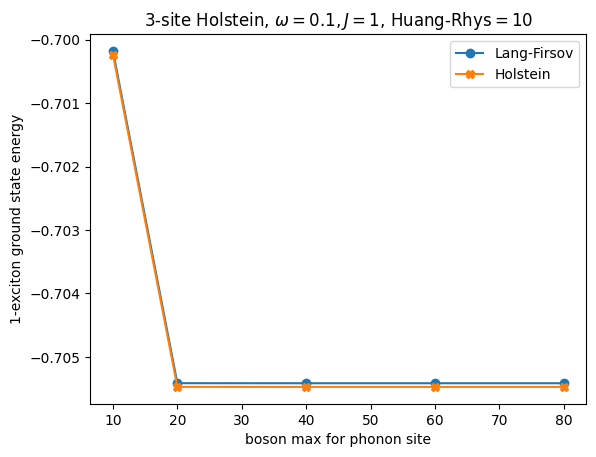

In [32]:
pdim = [10, 20, 40, 60, 80]
e = np.array(
    [[-0.7001757941034783, -0.7002324512079512],
     [-0.7054146830992755, -0.705472751068564],
     [-0.7054155636098844, -0.7054736322708557],
     [-0.7054155636097657, -0.7054736322708519],
     [-0.7054155636098376, -0.7054736322711038]]
)

import matplotlib.pyplot as plt
plt.plot(pdim, e[:, 0], 'o-', label='Lang-Firsov')
plt.plot(pdim, e[:, 1], 'X-', label='Holstein')
plt.legend()
plt.xlabel("boson max for phonon site")
plt.ylabel("1-exciton ground state energy")
plt.title(r'3-site Holstein, $\omega=0.1, J=1$, Huang-Rhys$=10$')